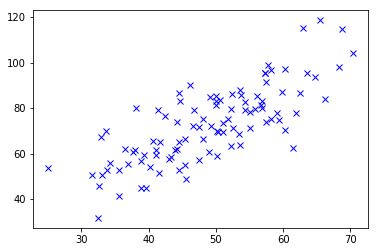

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("../l1_data.csv", delimiter=",")
plt.plot(data[:, 0], data[:, 1], 'bx')
plt.show()

In [92]:
def split(data):
    examples_count, columns_count = data.shape
    return data[:, 0:columns_count - 1], data[:, columns_count - 1]

def add_bias(data):
    examples_count, columns_count = data.shape
    bias = np.ones((examples_count, columns_count + 1))
    bias[:, 1:] = data
    return bias

def hypothesis(thetas, features):
    return np.dot(thetas, features.T)

def train(data, learning_rate=0.0001, iterations=30):
    features, y = split(data)
    bias_features = add_bias(features)
    examples_count, features_count = bias_features.shape
    costs = np.zeros(iterations)
    thetas = np.zeros((1, features_count))
    for i in range(iterations):
        costs[i] = (1 / (2 * examples_count)) * np.sum((hypothesis(thetas, bias_features) - y) ** 2, axis=1)
        thetas = thetas - (learning_rate / examples_count) * np.dot(hypothesis(thetas, bias_features) - y, bias_features)
    return thetas, costs

In [93]:
thetas, costs = train(data)

In [94]:
def plot(costs):
    plt.plot(costs)
    plt.show()

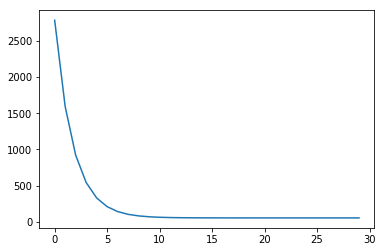

[ 2782.55391724  1593.13345917   922.64270969   544.67893403   331.61616325
   211.51008996   143.80483505   105.63855733    84.1237595     71.99560294
    65.15880998    61.30482289    59.13227965    57.90758673    57.21720853
    56.82803002    56.60864143    56.48496548    56.4152439     56.37593707
    56.35377539    56.34127864    56.33423013    56.33025286    56.32800688
    56.32673686    56.32601699    56.32560726    56.32537234    56.32523598]
[[ 0.02996375  1.4786303 ]]


In [95]:
plot(costs)
print(costs)
print(thetas)